<a href="https://colab.research.google.com/github/emilyjiminroh/2022_ai_winter_study/blob/main/chapter_11%5Cch11_Pima_Indian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = 'pima-indians-diabetes.csv'

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불러온 데이터셋을 적용합니다. 이 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv(my_data,
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


In [2]:
# 처음 5줄을 봅니다.
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [3]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [9]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


## 데이터 가공하기
단순히 나열 -> 한눈에 들어지 않음</br>
즉, 한 번 더 가공을 해 주어야 한다.</br>

**!! 목적에 주의하여!!**</br>

# 목적 : " 당뇨병 발병 예측 "
그러므로, 모든 정보는 **당뇨병 발병과 어떤 관계**가 있는지 중점으로 살펴보아야한다.


In [11]:
# groupby() => pregnant 정보를 기준으로 새 그룹 만들기
# as_index=False => pregnant 정보 옆에 새로운 index 만들기
# class의 평균을 내여 pregnant 기준으로 오름차순으로 정렬

print("<임신 횟수당 당뇨병 발병 확률>")
print(df[['pregnant', 'class']].groupby(['pregnant'],as_index=False).mean().sort_values(by='pregnant',ascending=True))

<임신 횟수당 당뇨병 발병 확률>
    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


## matplotlib 이용해 그래프로 표현하기
데이터의 특성을 쉽게 파악하기 위해!! </br>

그 중 **matplotlib**은 파이썬에서 그래프를 그릴때 가장 많이 사용됨.</br>
**seaborn** 라이브러리는 matplotlib를 기반으로 좀 더 정교한 그래프를 그리게 도와주어 정보끼리 어떤한 상간관계가 있는지 알 수 있다.

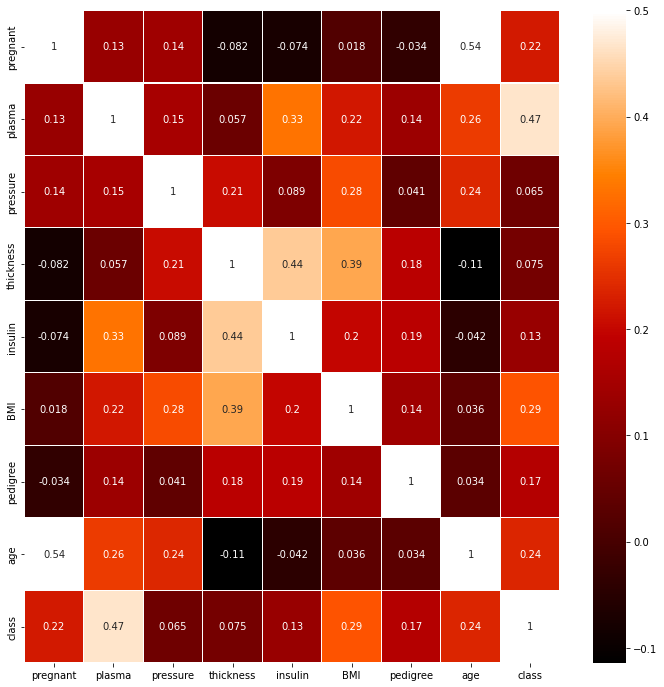

In [6]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
# heatmap() 각 항목간의 상간관계를 나타내 줌
# => 두 항목씩 짝을 지은 뒤 각각 어떤 패턴으로 변화하는지 관찰함
# 두 항목 간에 비슷한 패턴으로 변할 수록 1에 가까운 값 출력
# corr() => 상관계수 계산 함수 correlation
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True) # 실제 값 화면에 나타내기
plt.show()

# class에 가장 큰 영향을 주는 항목 찾기

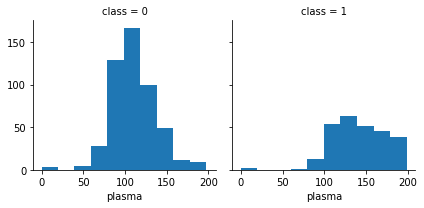

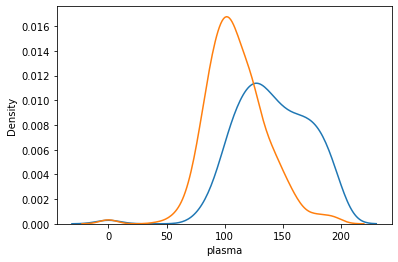

In [12]:
grid = sns.FacetGrid(df, col='class') # 액자를 만들어줌
grid.map(plt.hist, 'plasma',  bins=10) # bins 구간을 잘게 쪼겜
plt.show()

# 주황 = 당뇨X, 파랑 = 당뇨
sns.kdeplot(df.loc[df['class']==1,'plasma'],label='class=1')
sns.kdeplot(df.loc[df['class']==0,'plasma'],label='class=0')
plt.show()

# 당뇨병 집단이 plasma(공복 혈당 지수)가 높다

In [13]:
# 딥러닝을 구동하는 데 필요한 케라스 함수
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정
# random()함수에 내장된 수많은 '랜덤 테이블' 중 하나를 불러내 그 표의 순서대로 숫자를 보여줌.
# 따라서 seed값이 같으면 똑같은 랜덤 값을 출력한다.
np.random.seed(3)
tf.random.set_seed(3)

# 데이터
dataset = np.loadtxt(my_data, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) # 입력층 지정 
model.add(Dense(8, activation='relu')) # 은닉층 추가
model.add(Dense(1, activation='sigmoid')) # 출력층 지정

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 1/200
77/77 [==============================] - 1s 2ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 2ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 2ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6758
Epoch 11